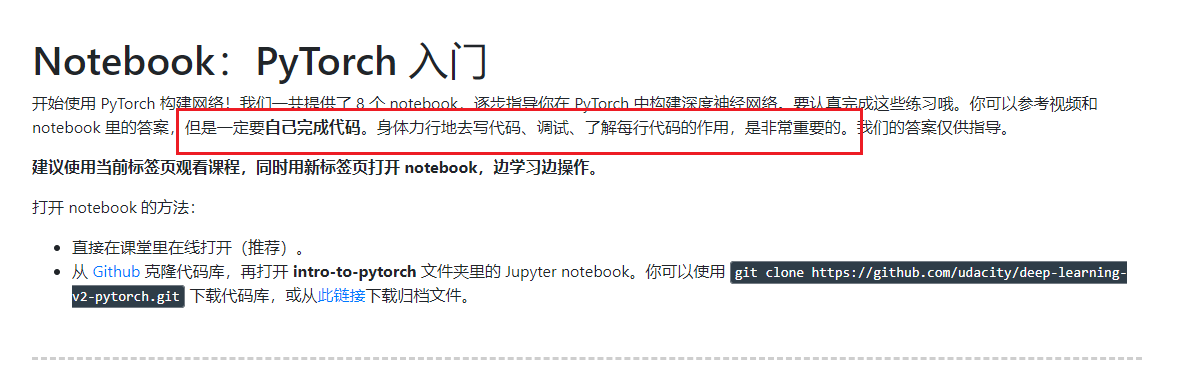

# 尝试总结和输出

### tensor的乘法

#### 每一步记得有个activation function

### reshape的方法

## 神经网络

基本元素：

1. 输入 inputs

2. Weights  和  Bias

3. 矩阵乘法

4. 激活函数

5. 可反复叠加，隐藏层


细节   尝试

### 如何快速的对一个新概念有感觉？

### tensors include vectors

## Introduction to PyTorch Keras and Tensor flow.

### torch is just like numpy

#### numpy 数据可以直接转换成 torch

### 都是要面对未知风险的

### Torch resize is a inplace operation
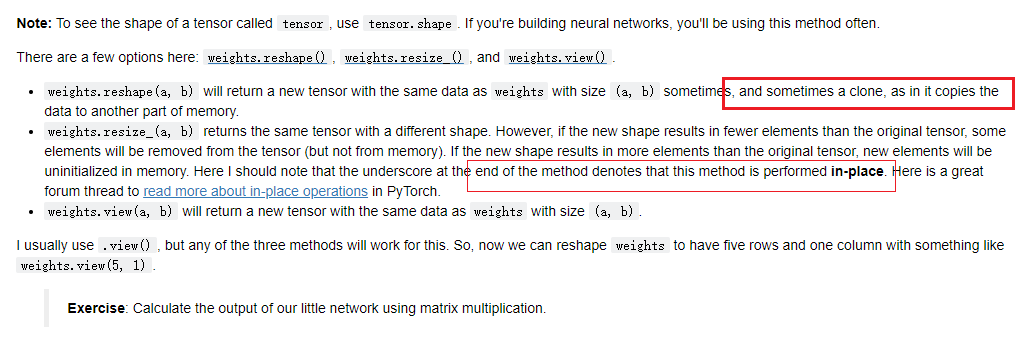

### But resize can lose data without returning errors sometimes.

### So torch.view may be the best way, which will return with the same data as original weights.

### 创造各种链接点

### 初期的基础一定要经历过   面对的

### 暂时离开，再回过来，记忆力要好

# Build a network with torch

We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

## 把大的，复杂的东西拆散

### 找需要你动手去想出来的东西

### 经历过相似的体验并有收获就可以解释

# 保证自己可以收纳和调取你学的东西

# 意义感

## 最初要能够框架集成的收集

### 记背后的动作而不记概念

### 自己可以尝试不断改动环境

### <font color='red'>  argMax函数的软化  softMax </font>

### Sigmoid  比值比和 Odds p/(1-p)

## 第一版可以非常不完美

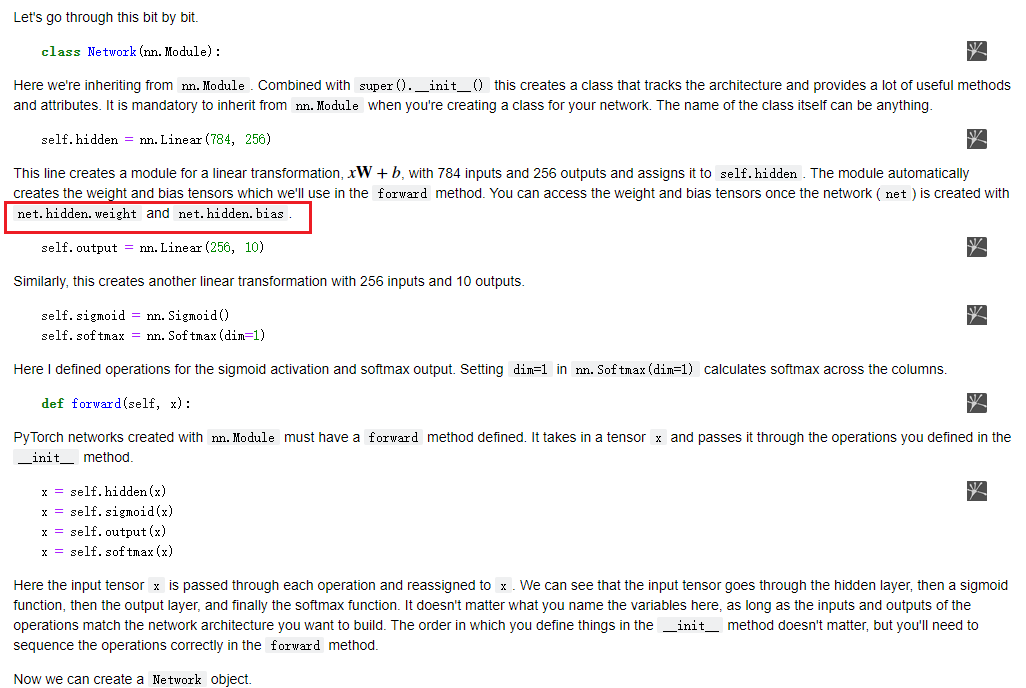

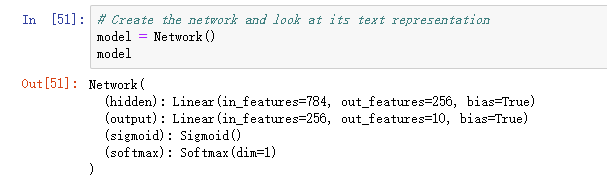

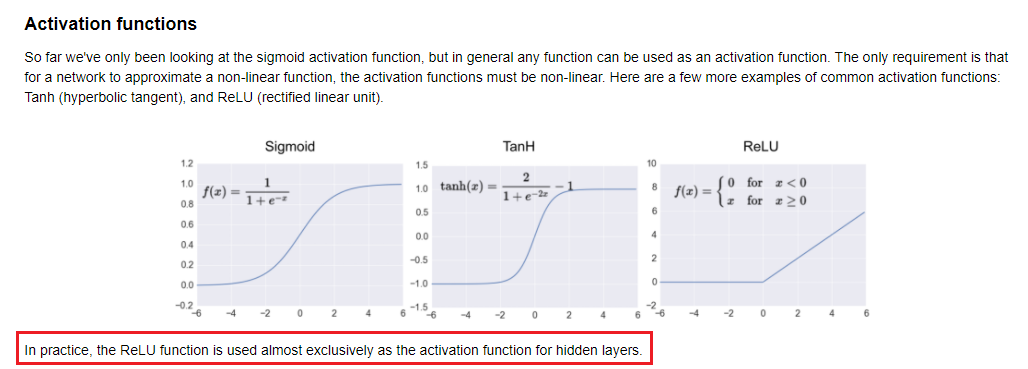

In [ ]:

## Your solution here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        
        return x

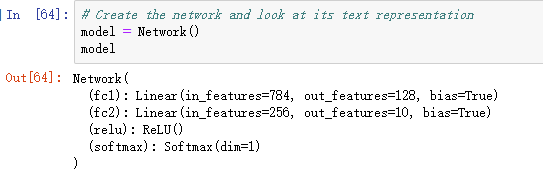

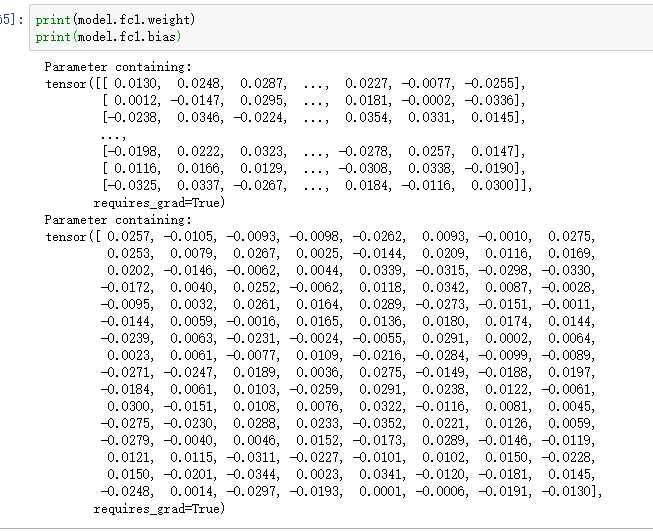

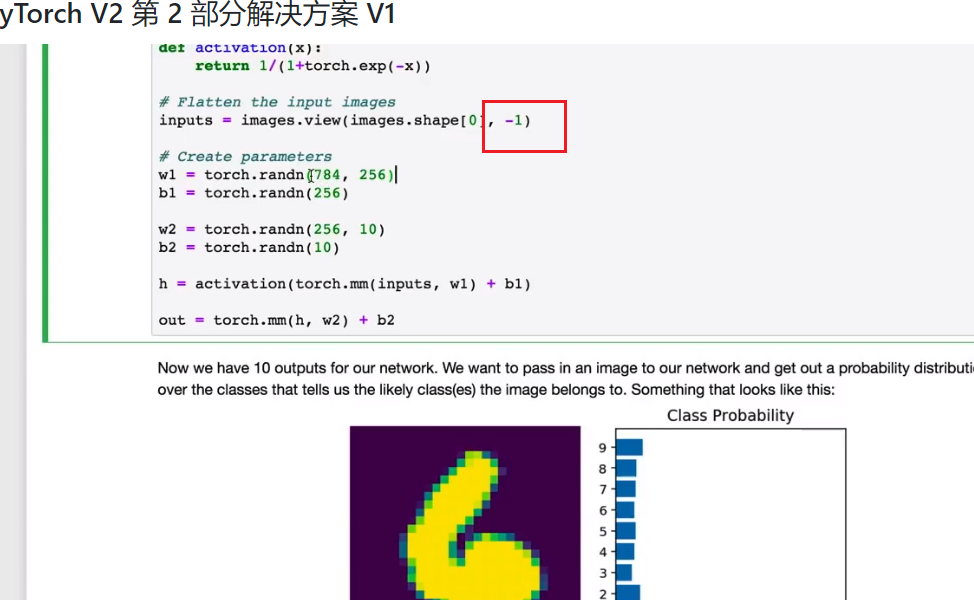

## Can fill values with Zero or Random
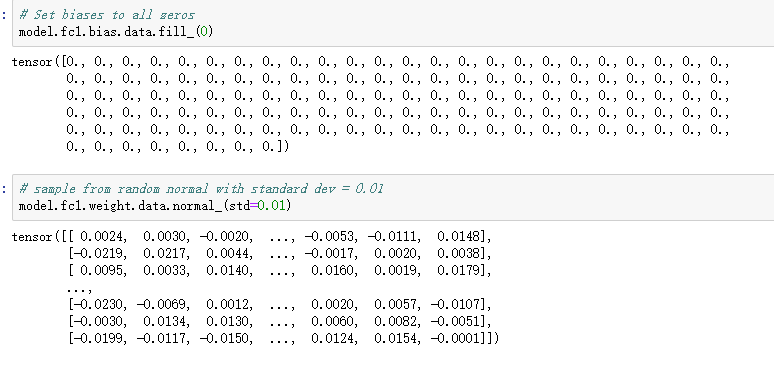

# nn.Sequential
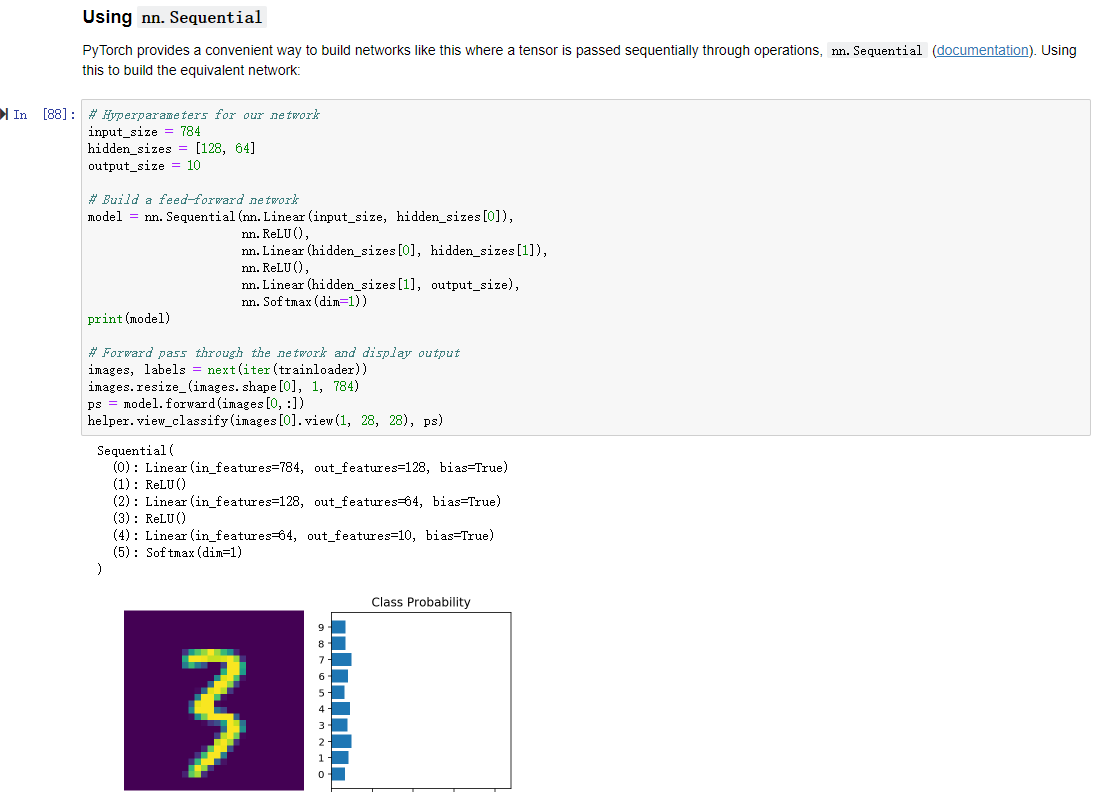

In [2]:
# With assigned names for each layer
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

## Question: 如何记录进度

## Tips：给问题分类，打tag

## Tips: 先看整体和路标，再看细节

## Note: Socores, not probabilities
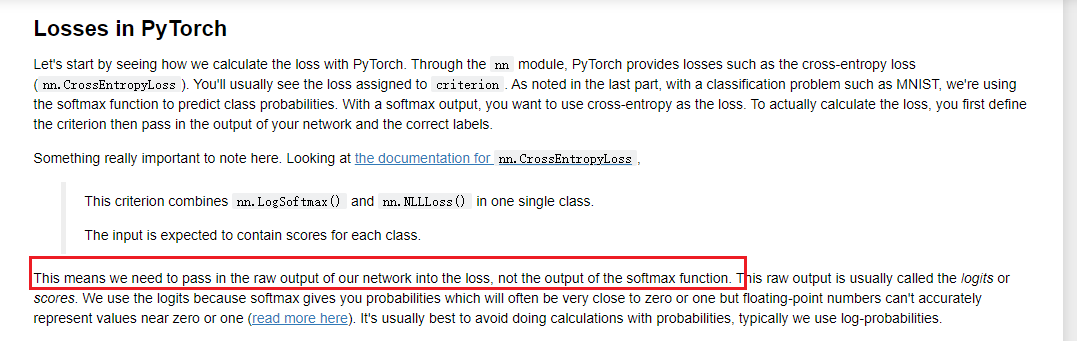

# Transform to normalize
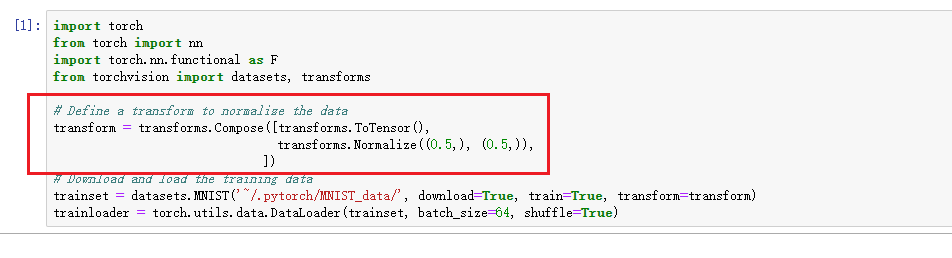

# Autograd
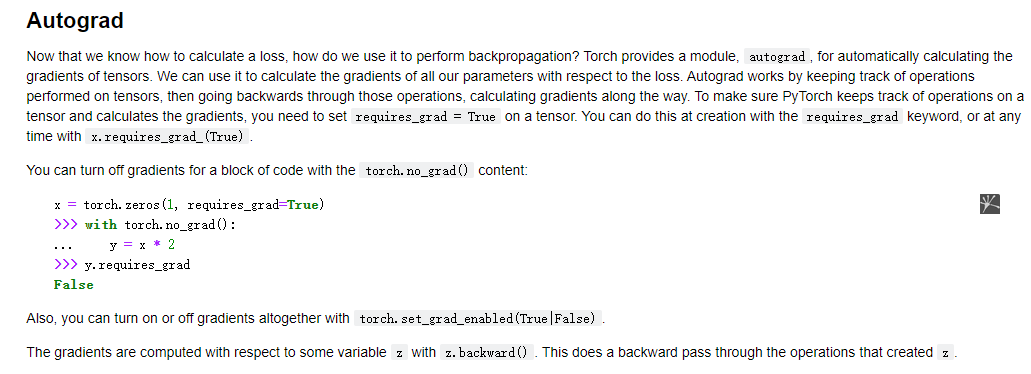

# 一个完整的网络训练过程

#### 每个batch为一组，计算grad

In [ ]:
## Your solution here

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        
        optimizer.zero_grad()

        # Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        
        loss = criterion(output, labels)
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

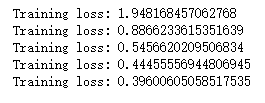

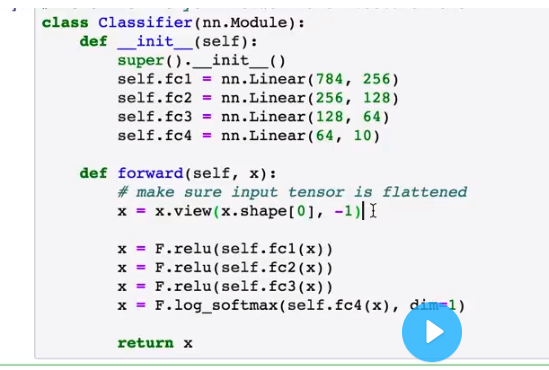

### 各种可用的套路和效果自己要知道

### Ideal： 花大量时间从零开始试试

### Know the story and the each steps

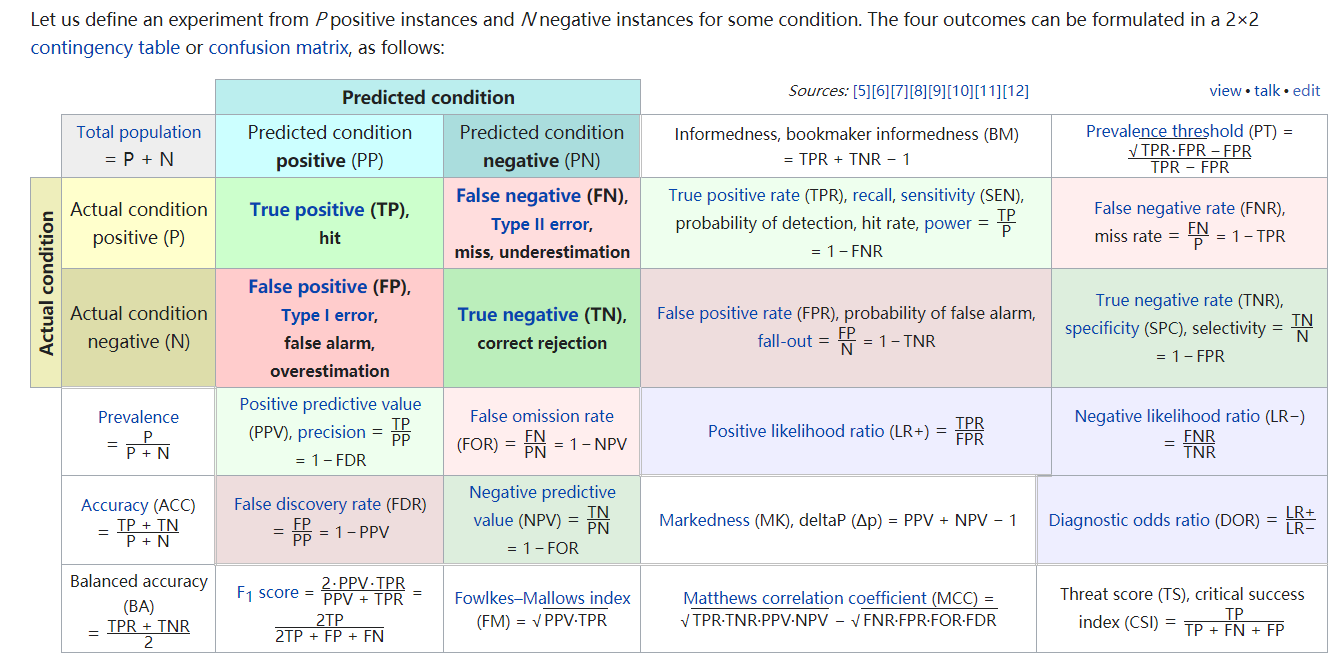

## Top k
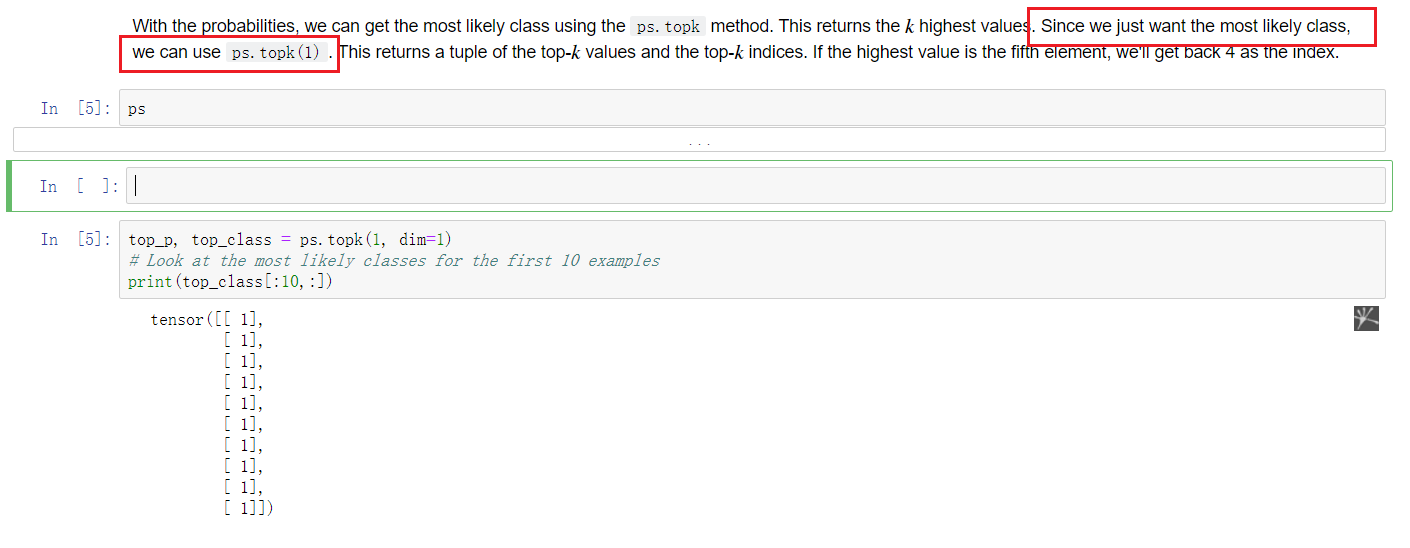

## Code:

In [ ]:
## TODO: Define your model with dropout added

from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [ ]:
model = Classifier()

In [ ]:
## TODO: Train your model with dropout, and monitor the training progress with the validation loss and accuracy
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 5
steps = 0

train_losses, test_losses = [], []
running_loss = 0


for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        
        optimizer.zero_grad()

        # Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        
        loss = criterion(output, labels)
        
        running_loss += loss.item()        
        
    with torch.no_grad():
        validation_loss = 0
        ps_all = torch.empty(0,1)
        for images, labels in testloader:  
            output = model(images)
            loss = criterion(output, labels)
            validation_loss+=loss.item()
            
            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            ps_all = torch.cat((ps_all, equals.type(torch.FloatTensor)))
        else:
            print(f"Training loss: {running_loss/len(trainloader)}")
            print(f"Validation loss: {validation_loss/len(testloader)}")
            ## TODO: Implement the validation pass and print out the validation accuracy
            accuracy = torch.mean(ps_all.type(torch.FloatTensor))
            print(f'Accuracy: {accuracy.item()*100}%')
            print()

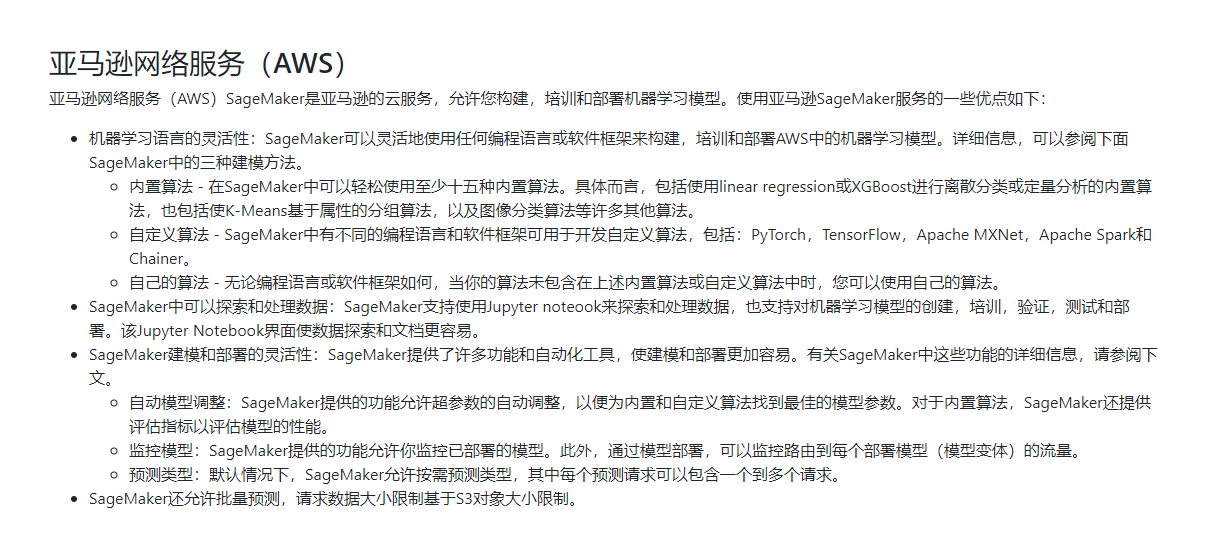

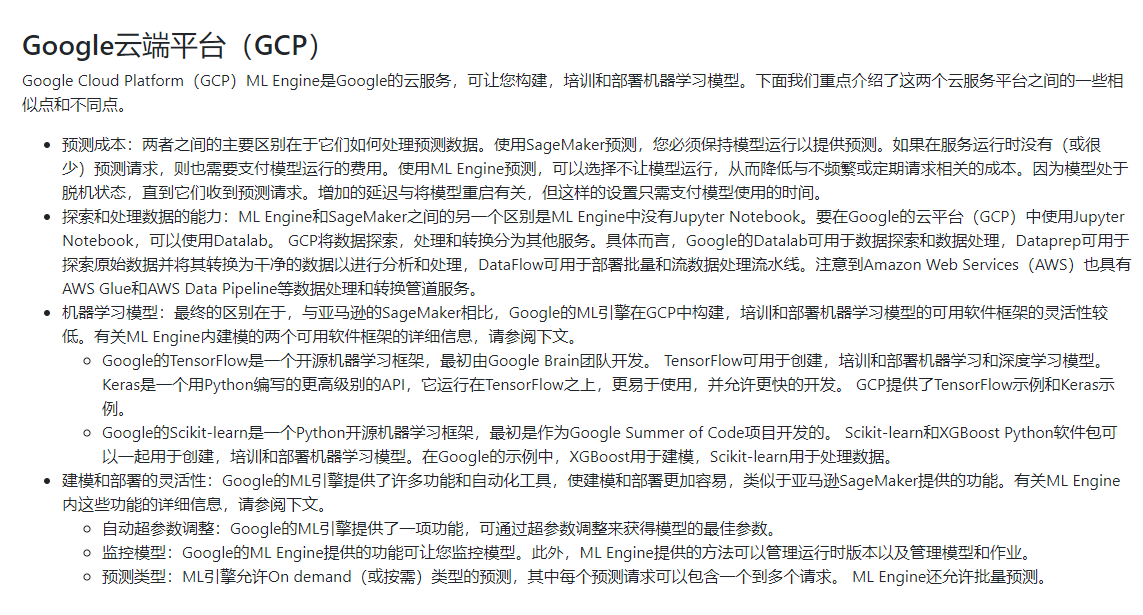

# Save and Load

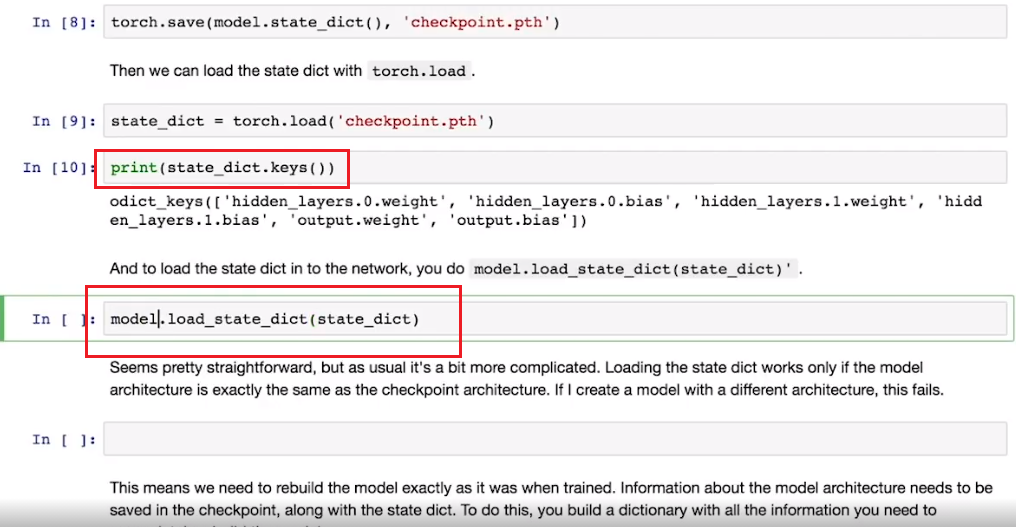

# FC Model


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F


class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.5):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input layer
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
        
        '''
        super().__init__()
        # Input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        
        self.dropout = nn.Dropout(p=drop_p)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)


def validation(model, testloader, criterion):
    accuracy = 0
    test_loss = 0
    for images, labels in testloader:

        images = images.resize_(images.size()[0], 784)

        output = model.forward(images)
        test_loss += criterion(output, labels).item()

        ## Calculating the accuracy 
        # Model's output is log-softmax, take exponential to get the probabilities
        ps = torch.exp(output)
        # Class with highest probability is our predicted class, compare with true label
        equality = (labels.data == ps.max(1)[1])
        # Accuracy is number of correct predictions divided by all predictions, just take the mean
        accuracy += equality.type_as(torch.FloatTensor()).mean()

    return test_loss, accuracy


def train(model, trainloader, testloader, criterion, optimizer, epochs=5, print_every=40):
    
    steps = 0
    running_loss = 0
    for e in range(epochs):
        # Model in training mode, dropout is on
        model.train()
        for images, labels in trainloader:
            steps += 1
            
            # Flatten images into a 784 long vector
            images.resize_(images.size()[0], 784)
            
            optimizer.zero_grad()
            
            output = model.forward(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

            if steps % print_every == 0:
                # Model in inference mode, dropout is off
                model.eval()
                
                # Turn off gradients for validation, will speed up inference
                with torch.no_grad():
                    test_loss, accuracy = validation(model, testloader, criterion)
                
                print("Epoch: {}/{}.. ".format(e+1, epochs),
                      "Training Loss: {:.3f}.. ".format(running_loss/print_every),
                      "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
                      "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
                
                running_loss = 0
                
                # Make sure dropout and grads are on for training
                model.train()


In [ ]:
# Save
torch.save(model.state_dict(), 'checkpoint.pth')

# Load
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

# Load with model
model.load_state_dict(state_dict)

In [ ]:
# Better way of saving
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')


def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model


model = load_checkpoint('checkpoint.pth')
print(model)

Normalizing helps keep the network work weights near zero which in turn makes backpropagation more stable. Without normalization, networks will tend to fail to learn.